 # This notebook will cover 
 
 ## 1) Linear grammars, illustrated by defining a fresh NFA and converting it into a CFG, and simulating it via a PDA
 
 ## 2) Ambiguity and inherent ambiguity, again illustrated via a PDA that encodes such a language
 
 # These exercises will be featured in the Quiz-7

In [8]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --

from jove.SystemImports import *
from jove.DotBashers    import *

from jove.Def_NFA       import *
from jove.Def_DFA       import *
from jove.Def_RE2NFA    import *

from jove.Def_md2mc     import *
from jove.Def_PDA       import *
from jove.AnimatePDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# A CFG with purely right-linear productions is equivalent to an NFA

### Let us illustrate this by converting an NFA to a CFG that has a linear grammar. To make things more interesting, we pick a slight variant of a language seen before: ``IF there is a second-last position THEN that must be a 1``

## For practice, I'll let you write a compact RE for it below; I'll just provide the NFA

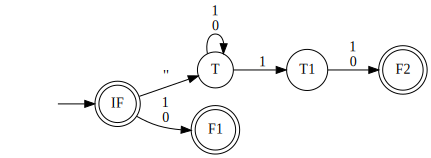

In [9]:
nfa_if_sndlast_then_1 = md2mc('''
NFA
!! Read the name of the NFA as
!! "IF there is a second-last position THEN that must be a 1"
 
IF : 0|1    -> F1
IF : ''     -> T
T  : 1      -> T1
T  : 0|1    -> T
T1 : 0|1    -> F2
''')

dotObj_nfa(nfa_if_sndlast_then_1, FuseEdges=True)

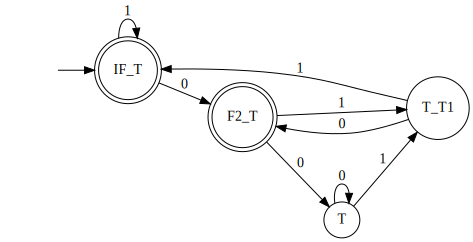

In [10]:
dfa_if_sndlast_then_1 = min_dfa(nfa2dfa(nfa_if_sndlast_then_1))
dotObj_dfa(dfa_if_sndlast_then_1, FuseEdges=True)

 # Write an RE and make sure that agrees!
 
 # **GIVEN TO YOU FOR EXTRA PRACTICE WRITING RE**
 
 ## Will be a quiz question

Generating LALR tables


Illegal character '.'
Illegal character '.'
Illegal character '.'
Illegal character '.'
Illegal character '.'
Illegal character '.'


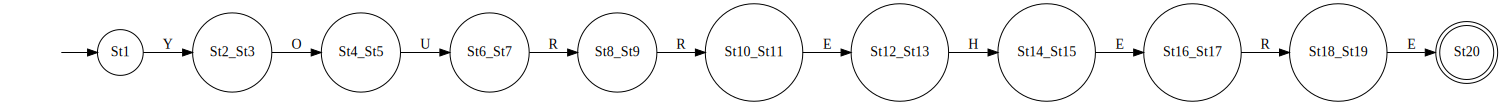

In [4]:
# Let's be absolutely sure we got the right DFA

RE_for_this_nfa = " ... YOUR RE HERE ... "   # <<====== WRITE THIS RE !!!!

dfaRE_if_sndlast_then_1 = min_dfa(nfa2dfa(re2nfa(RE_for_this_nfa)))
dotObj_dfa(dfaRE_if_sndlast_then_1, FuseEdges=True)

In [11]:
iso_dfa(dfa_if_sndlast_then_1, dfaRE_if_sndlast_then_1)

False

## Repeat the NFA to be "closer" to the CFG/PDA

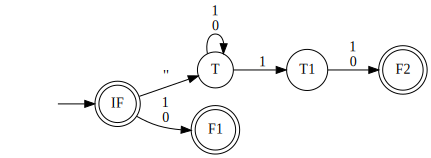

In [6]:
nfa_if_sndlast_then_1 = md2mc('''
NFA
!! Read the name of the NFA as
!! "IF there is a second-last position THEN that must be a 1"

IF : 0|1    -> F1
IF : ''     -> T
T  : 1      -> T1
T  : 0|1    -> T
T1 : 0|1    -> F2
''')
 
dotObj_nfa(nfa_if_sndlast_then_1, FuseEdges=True)

# Let's obtain a CFG directly from nfa_if_sndlast_then_1 and render as a PDA

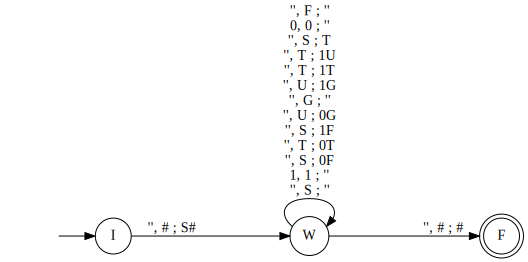

In [7]:
pda_if_sndlast_then_1 = md2mc('''
PDA

!! WE NOW DERIVE THE LINEAR GRAMMAR
!! ============================================================================
!! First we will convert directly, by taking NFA states to be nonterminal names
!! Then we will convert it over to one-letter nonterminals 

!! IF -> ''           -- because "IF" is an initial and final
!! IF -> 1 F1 | 0 F1  -- because IF jumps to F1 upon 0 or 1
!! F1 -> ''           -- because F1 is also a final

!! IF ->  T           -- because of IF jumping to T upon ''
!! T  -> 0 T | 1 T    -- because of T's self-loop

!! T  -> 1 T1         -- because of T's transition to T1

!! T1 -> 0 F2 | 1 F2  -- because of T1's transitions

!! F2 -> ''           -- because F2 is final

!! =============================================================================

!! REMEMBER THAT JOVE's grammar simulation via PDA needs one-letter non-terminals
!! IF => S ; F1 => F ; F2 -> G ; T => T ; T1 => U
!! So we apply these renamings to obtain the grammar below:

!! S -> ''            
!! S -> 1 F | 0 F    
!! F -> ''            

!! S ->  T          
!! T  -> 0 T | 1 T     

!! T  -> 1 U

!! U -> 0 G | 1 G   

!! G -> ''            
 
!! =============================================================================
!! Now a PDA based on the above

!!-- standard transitions!
I : '',#; S# -> W
W : '',#; #  -> F
!!-- Sigma-based transitions
W : 0,0; '' -> W
W : 1,1; '' -> W

!!==== Now, CFG rules translated below to PDA rules, one by one ====

!! S -> ''  
W : '',S; '' -> W

!! S -> 1 F 
W : '',S ; 1F -> W

!! S -> 0 F
W : '',S ; 0F -> W

!! F -> ''         
W : '',F; '' -> W

!! S  -> T      
W : '',S; T  -> W

!! T  -> 0 T   
W : '',T; 0T -> W

!! T  -> 1 T
W : '',T; 1T -> W

!! T  -> 1 U
W : '',T; 1U -> W

!! U -> 0 G 
W : '',U; 0G -> W

!! U -> 1 G   
W : '',U; 1G -> W

!! G -> ''  
W : '',G; '' -> W
 

''')

dotObj_pda(pda_if_sndlast_then_1, FuseEdges=True)

In [ ]:
help(explore_pda)

In [ ]:
explore_pda('', pda_if_sndlast_then_1)

In [ ]:
explore_pda('0', pda_if_sndlast_then_1)

In [ ]:
explore_pda('1', pda_if_sndlast_then_1)

In [ ]:
explore_pda('10', pda_if_sndlast_then_1)

In [ ]:
explore_pda('01', pda_if_sndlast_then_1)

In [ ]:
explore_pda('1001010', pda_if_sndlast_then_1)

In [ ]:
explore_pda('100100', pda_if_sndlast_then_1)

In [ ]:
AnimatePDA(pda_if_sndlast_then_1, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# Reverse the CFG to obtain a purely left-linear grammar
## Then express the CFG as a PDA

In [ ]:
pda_rev = md2mc('''

PDA     

!! =============================================================================
!! We will reverse production-by-production, keeping the same name for the nonterminals!

I : '',#; S# -> W
W : '',#; #  -> F

!!-- Sigma-based transitions
W : 0,0; '' -> W
W : 1,1; '' -> W

!!==== Now, CFG rules for reversed productions ====

!! S -> ''  
W : '',S; '' -> W

!! S -> 1 F ===REVERSED===> S -> F 1
W : '',S ; F1 -> W

!! S -> 0 F ===REVERSED===> S -> F 0
W : '',S ; F0 -> W

!! F -> '' ===REVERSED===> F -> ''        
W : '',F; '' -> W

!! S  -> T ===REVERSED===> S -> T   
W : '',S; T  -> W

!! T  -> 0 T ===REVERSED===> T -> T 0  
W : '',T; T0 -> W
 
!! T  -> 1 T ===REVERSED===> T -> T 1
W : '',T; T1 -> W

!! T  -> 1 U ===REVERSED===> T -> U 1
W : '',T; U1 -> W

!! U -> 0 G ===REVERSED===> U -> G 0
W : '',U; G0 -> W

!! U -> 1 G ===REVERSED===> U -> G 1   
W : '',U; G1 -> W

!! G -> ''  ===REVERSED===> G -> ''
W : '',G; '' -> W
 

''')

dotObj_pda(pda_rev, FuseEdges=True)

In [ ]:
explore_pda('', pda_rev)

In [ ]:
explore_pda('0', pda_rev)

In [ ]:
explore_pda('1', pda_rev)

# Reversed PDA works but needs STKMAX = 9

In [ ]:
# REVERSE THIS TEST:  explore_pda('1001010', pda_if_sndlast_then_1)

explore_pda('0101001', pda_rev, STKMAX=9)

# Rejects up to stack depth of 12

In [ ]:
# REVERSE THIS TEST:  explore_pda('1001000', pda_if_sndlast_then_1)

explore_pda('0001001', pda_rev, STKMAX=12)

In [ ]:
AnimatePDA(pda_rev, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# Now for an inherently ambiguous language

## $\{ a^i b^j c^k \; : \; (i=j)\; \vee \; (j=k) \}$

## No CFG can avoid ambiguity! 

## Let's try a CFG just for illustration


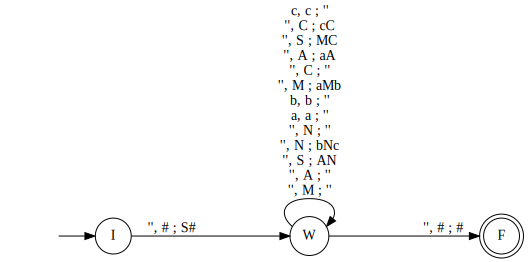

In [12]:
pda_inh_amb = md2mc('''PDA

!!---
!! 
!!   where M is "match a/b" and N is "match b/c"
!!   and C means any number of Cs, and A means any number of As
!!
!! S -> M C |  A N    
!!
!! M -> a M b | ''
!! C -> c C   | ''

!! N -> b N c | ''
!! A -> a A   | ''
!!
!!---

!!-- Transitions for the CFG rules


!! S -> M C |  A N 

W : '',S; MC -> W
W : '',S; AN -> W


!! M -> a M b | ''
W : '',M; aMb -> W
W : '',M; ''  -> W


!! C -> c C   | ''
W : '',C; cC  -> W
W : '',C; ''  -> W

!! N -> b N C | ''
W : '',N; bNc -> W
W : '',N; ''  -> W

!! A -> a A   | ''
W : '',A; aA  -> W
W : '',A; ''  -> W


!!-- Standard transitions for CFG 2 PDA
I : '',#; S# -> W
W : '',#; #  -> F

!!-- Transitions for Sigma
W : a,a; '' -> W
W : b,b; '' -> W
W : c,c; '' -> W

 


''')

DO_pda_inh_amb = dotObj_pda(pda_inh_amb, FuseEdges=True)
DO_pda_inh_amb

In [13]:
explore_pda('abc', pda_inh_amb)

String abc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abc', '#')
->  ('W', 'abc', 'S#')
->  ('W', 'abc', 'MC#')
->  ('W', 'abc', 'aMbC#')
->  ('W', 'bc', 'MbC#')
->  ('W', 'bc', 'bC#')
->  ('W', 'c', 'C#')
->  ('W', 'c', 'cC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abc', '#')
->  ('W', 'abc', 'S#')
->  ('W', 'abc', 'AN#')
->  ('W', 'abc', 'aAN#')
->  ('W', 'bc', 'AN#')
->  ('W', 'bc', 'N#')
->  ('W', 'bc', 'bNc#')
->  ('W', 'c', 'Nc#')
->  ('W', 'c', 'c#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [ ]:
AnimatePDA(pda_inh_amb, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# A chatty parser for PDA will parse pda_inh_amb now !!

In [14]:
from jove.Def_md2mc_chatty     import *

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)



Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got one label of a *FA, which is an ID, that being 
Got one label of a *FA, which is an ID, that being S
Got one label of a *FA, which is an ID, that being MC
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 
Got one label of a *FA, which is an ID, that being S
Got one label of a *FA, which is an ID, that being AN
Got a Jove markdown comment
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID

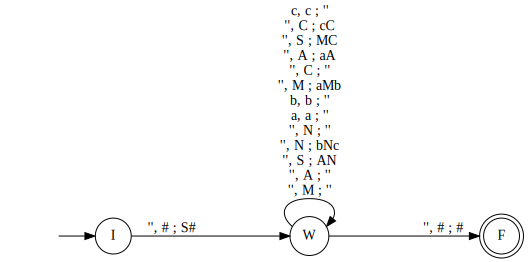

In [15]:
pda_inh_amb = md2mc('''PDA

!!---
!! 
!!   where M is "match a/b" and N is "match b/c"
!!   and C means any number of Cs, and A means any number of As
!!
!! S -> M C |  A N    
!!
!! M -> a M b | ''
!! C -> c C   | ''

!! N -> b N c | ''
!! A -> a A   | ''
!!
!!---

!!-- Transitions for the CFG rules


!! S -> M C |  A N 

W : '',S; MC -> W
W : '',S; AN -> W


!! M -> a M b | ''
W : '',M; aMb -> W
W : '',M; ''  -> W


!! C -> c C   | ''
W : '',C; cC  -> W
W : '',C; ''  -> W

!! N -> b N C | ''
W : '',N; bNc -> W
W : '',N; ''  -> W

!! A -> a A   | ''
W : '',A; aA  -> W
W : '',A; ''  -> W


!!-- Standard transitions for CFG 2 PDA
I : '',#; S# -> W
W : '',#; #  -> F

!!-- Transitions for Sigma
W : a,a; '' -> W
W : b,b; '' -> W
W : c,c; '' -> W

 


''')

DO_pda_inh_amb = dotObj_pda(pda_inh_amb, FuseEdges=True)
DO_pda_inh_amb